In [6]:
import pandas as pd

In [8]:
loan_df = pd.read_csv(r"C:\Users\MM COMPUTERS\Downloads\loan_data.csv")

In [12]:
loan_df.head()

,CustomerID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Default
0,1001,Male,Yes,1,Graduate,Yes,2526,661,540,120,0,Urban,1
1,1002,Female,Yes,2,Not Graduate,No,5224,12075,522,120,1,Semiurban,1
2,1003,Male,Yes,0,Not Graduate,No,17069,13753,59,360,1,Semiurban,0
3,1004,Male,No,0,Graduate,No,13536,11811,454,120,1,Urban,0
4,1005,Male,Yes,0,Graduate,No,15547,14788,351,120,1,Semiurban,0


# EDA Process

In [16]:
loan_df.shape

(500, 13)

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         500 non-null    int64 
 1   Gender             500 non-null    object
 2   Married            500 non-null    object
 3   Dependents         500 non-null    object
 4   Education          500 non-null    object
 5   Self_Employed      500 non-null    object
 6   ApplicantIncome    500 non-null    int64 
 7   CoapplicantIncome  500 non-null    int64 
 8   LoanAmount         500 non-null    int64 
 9   Loan_Amount_Term   500 non-null    int64 
 10  Credit_History     500 non-null    int64 
 11  Property_Area      500 non-null    object
 12  Loan_Default       500 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 50.9+ KB


In [20]:
loan_df.isnull().sum()

CustomerID           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Default         0
dtype: int64

In [22]:
loan_df.describe()

,CustomerID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Default
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,12885.314000,7871.504000,395.022000,243.000000,0.810000,0.478000
std,144.481833,6507.045648,4201.448479,191.041827,86.108242,0.392694,0.500016
min,1001.000000,2011.000000,16.000000,50.000000,120.000000,0.000000,0.000000
25%,1125.750000,7246.250000,4551.250000,235.750000,180.000000,1.000000,0.000000
50%,1250.500000,12805.000000,7964.000000,400.500000,240.000000,1.000000,0.000000
75%,1375.250000,18340.250000,11446.000000,568.250000,300.000000,1.000000,1.000000
max,1500.000000,24986.000000,14916.000000,699.000000,360.000000,1.000000,1.000000


In [34]:
loan_df.columns

Index(['CustomerID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Default'],
      dtype='object')

# Data Cleaning

In [36]:
loan_df= loan_df.drop('CustomerID', axis =1)

In [38]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Default
0,Male,Yes,1,Graduate,Yes,2526,661,540,120,0,Urban,1
1,Female,Yes,2,Not Graduate,No,5224,12075,522,120,1,Semiurban,1
2,Male,Yes,0,Not Graduate,No,17069,13753,59,360,1,Semiurban,0
3,Male,No,0,Graduate,No,13536,11811,454,120,1,Urban,0
4,Male,Yes,0,Graduate,No,15547,14788,351,120,1,Semiurban,0


# Encode Categorical Columns Into Numbers

In [43]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

cat_cols = ["Gender", "Married", "Dependents", "Education",
            "Self_Employed", "Property_Area"]

for col in cat_cols:
    loan_df[col] = le.fit_transform(loan_df[col])


In [49]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Default
0,1,1,1,0,1,2526,661,540,120,0,2,1
1,0,1,2,1,0,5224,12075,522,120,1,1,1
2,1,1,0,1,0,17069,13753,59,360,1,1,0
3,1,0,0,0,0,13536,11811,454,120,1,2,0
4,1,1,0,0,0,15547,14788,351,120,1,1,0


# Define Features (X) and Target (y)

In [54]:
X = loan_df.drop("Loan_Default", axis=1)
y = loan_df["Loan_Default"]

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regresion Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [70]:
y_pred = model.predict(X_test)

# Evaluate the Model

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


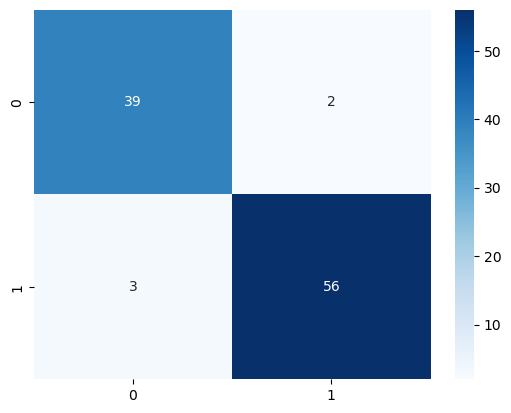

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.97      0.95      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# Features Importance

In [91]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

importance

#higher coefficient → increases probability of default

#negative coefficient → decreases risk

,Feature,Coefficient
10,Property_Area,0.238773
4,Self_Employed,0.197780
7,LoanAmount,0.017066
5,ApplicantIncome,0.000002
6,CoapplicantIncome,-0.000037
8,Loan_Amount_Term,-0.004164
2,Dependents,-0.022724
0,Gender,-0.239452
3,Education,-0.370459
1,Married,-0.503551
